In [1]:
!rm -r G.A.I_MISCELLANEUS_RESOURCES mnist_data
!git clone https://github.com/Q-b1t/G.A.I_MISCELLANEUS_RESOURCES.git
!mkdir diabetes_dataset
!cp /content/G.A.I_MISCELLANEUS_RESOURCES/diabetes_dataset/diabetes.csv diabetes_dataset

rm: cannot remove 'mnist_data': No such file or directory
Cloning into 'G.A.I_MISCELLANEUS_RESOURCES'...
remote: Enumerating objects: 74, done.
remote: Counting objects: 100% (74/74), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 74 (delta 10), reused 66 (delta 5), pack-reused 0
Receiving objects: 100% (74/74), 18.17 MiB | 37.83 MiB/s, done.
Resolving deltas: 100% (10/10), done.
mkdir: cannot create directory ‘diabetes_dataset’: File exists


# Data Analysis

In [2]:
import pandas as pd
import numpy as np

In [3]:
# get the data
df = pd.read_csv("/content/diabetes_dataset/diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Look at some graphs to see the distribution of the features in cuestion.

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<Axes: >

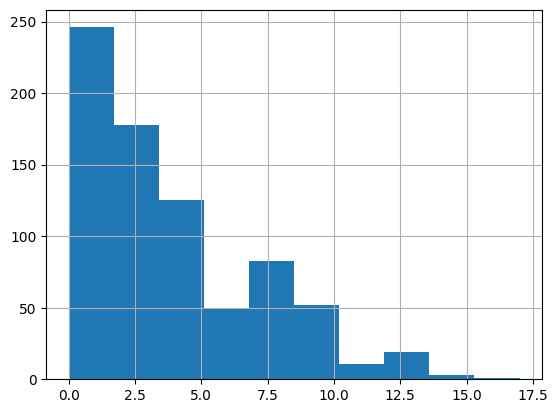

In [6]:
df["Pregnancies"].hist()

<Axes: >

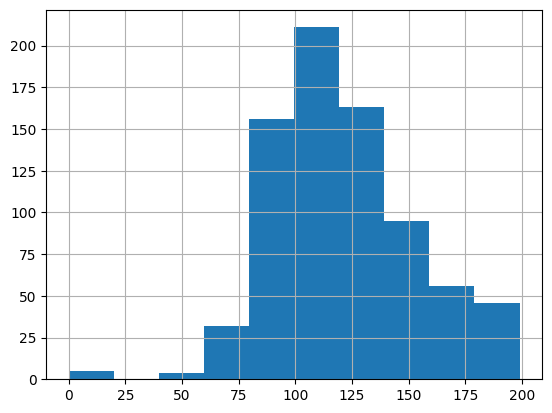

In [7]:
df["Glucose"].hist()

array([[<Axes: xlabel='Pregnancies', ylabel='Pregnancies'>,
        <Axes: xlabel='Glucose', ylabel='Pregnancies'>,
        <Axes: xlabel='BloodPressure', ylabel='Pregnancies'>,
        <Axes: xlabel='SkinThickness', ylabel='Pregnancies'>,
        <Axes: xlabel='Insulin', ylabel='Pregnancies'>,
        <Axes: xlabel='BMI', ylabel='Pregnancies'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Pregnancies'>,
        <Axes: xlabel='Age', ylabel='Pregnancies'>,
        <Axes: xlabel='Outcome', ylabel='Pregnancies'>],
       [<Axes: xlabel='Pregnancies', ylabel='Glucose'>,
        <Axes: xlabel='Glucose', ylabel='Glucose'>,
        <Axes: xlabel='BloodPressure', ylabel='Glucose'>,
        <Axes: xlabel='SkinThickness', ylabel='Glucose'>,
        <Axes: xlabel='Insulin', ylabel='Glucose'>,
        <Axes: xlabel='BMI', ylabel='Glucose'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Glucose'>,
        <Axes: xlabel='Age', ylabel='Glucose'>,
        <Axes: xlabel='Outcom

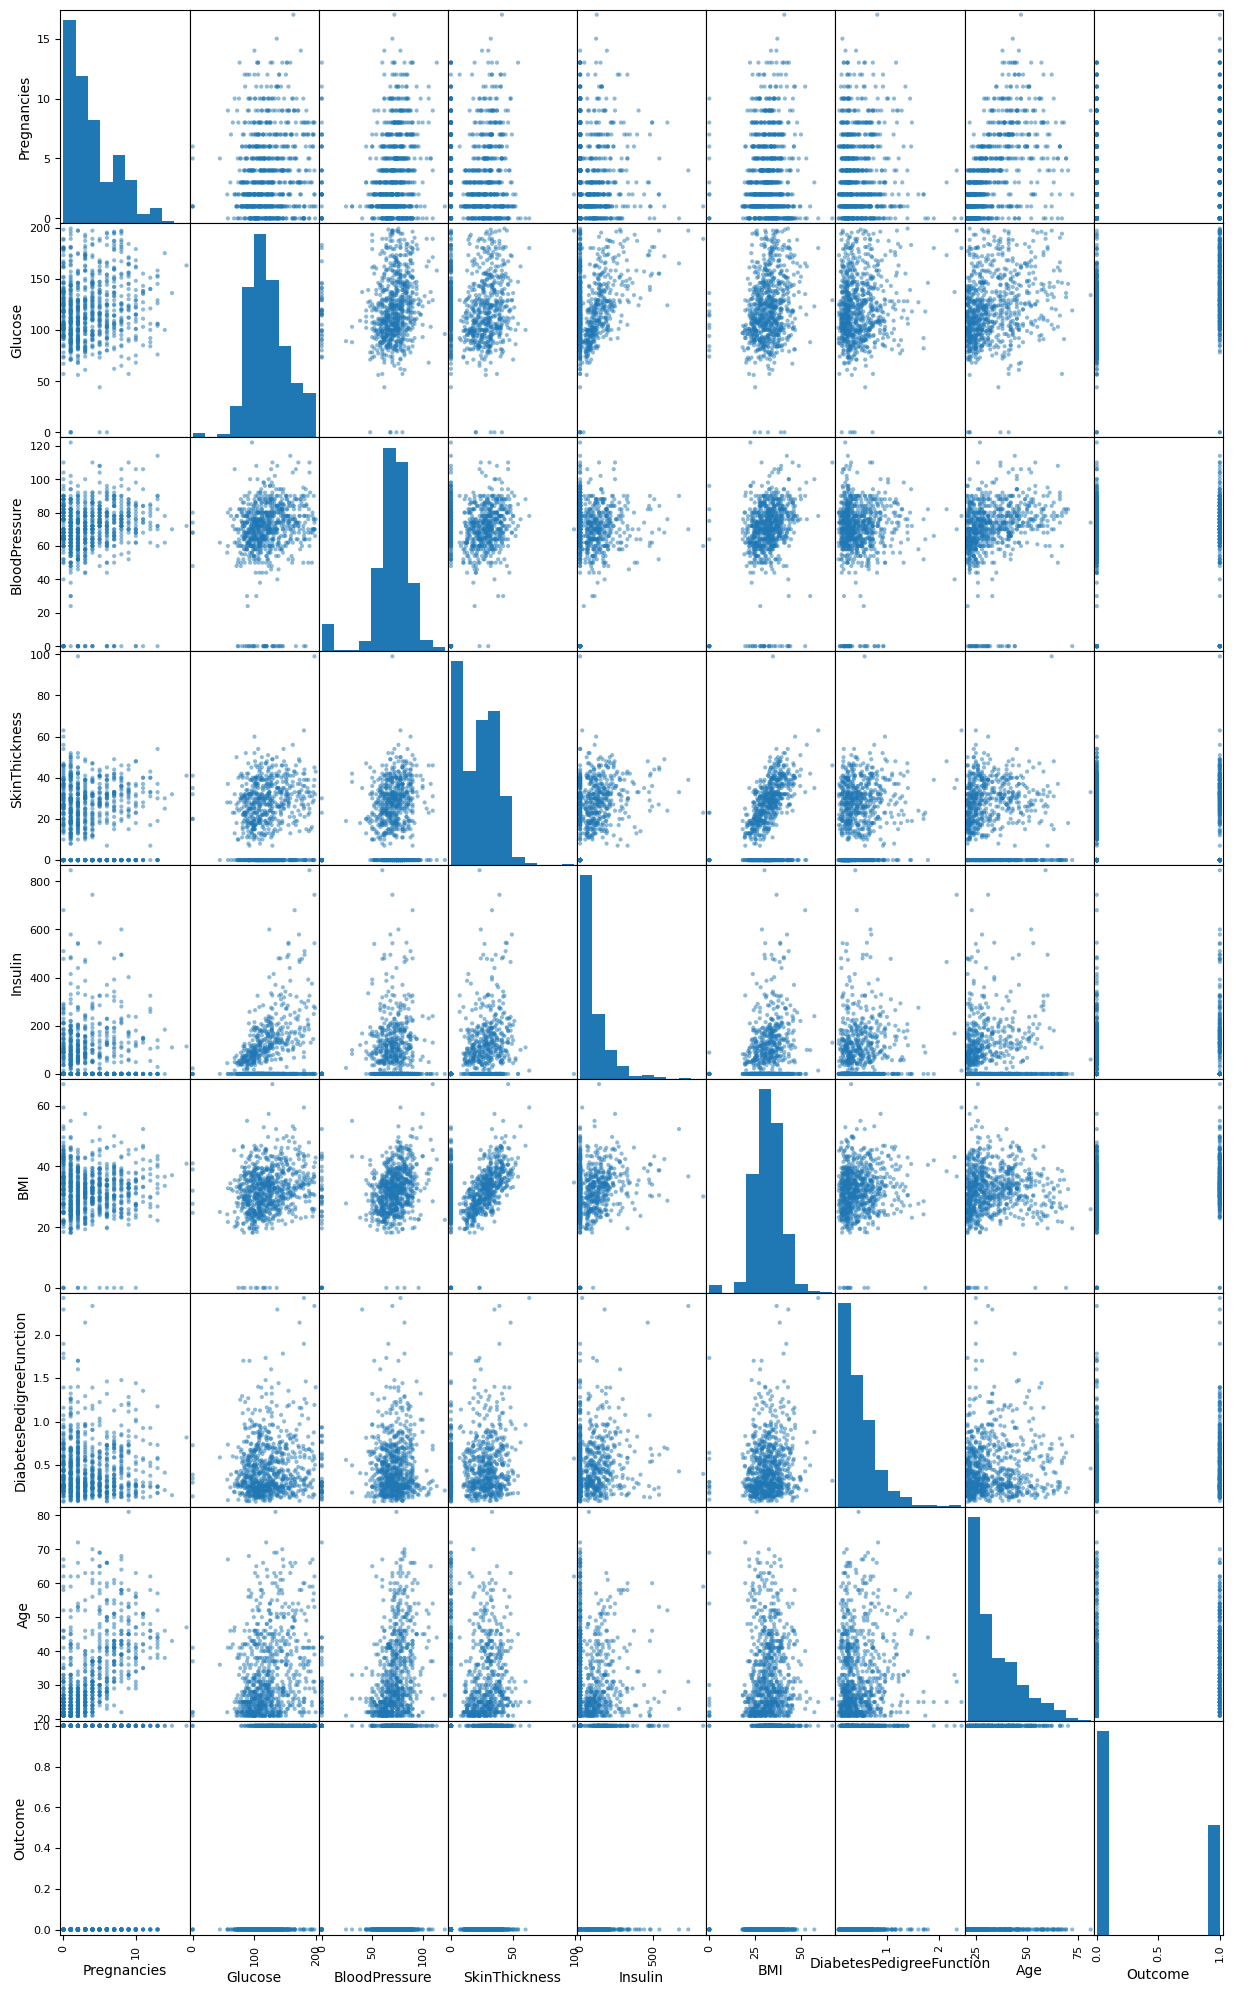

In [8]:
pd.plotting.scatter_matrix(df,figsize=(15,25))

Some features seem to be closely correlated with one another (ej. Glucose -> Insulin, BMI -> Skin Thickness ). This indicates the independence assumption of naive bayes does not hold.

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- The inputs are not in the same scale.
- The model works with probabilities, so this is not an issue.
- Some features have 0 in the mean value, which may be an issue (would only make sense for pregnancies).

In [10]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB

In [11]:
df_train,df_test = train_test_split(df,test_size=0.2,random_state=1337)

In [12]:
features = list(df.columns)[:-1]
features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [13]:
X_train,y_train = df_train[features],df_train["Outcome"] # training data and labels
X_test,y_test = df_test[features],df_test["Outcome"] # testing data and labels

In [14]:
model = GaussianNB()
model.fit(X_train, y_train)
print(f"[~] train acc: {model.score(X_train, y_train)}")
print(f"[~] test acc: {model.score(X_test, y_test)}")

[~] train acc: 0.752442996742671
[~] test acc: 0.7857142857142857


In [15]:
X = df[features]
y = df['Outcome']
result = cross_val_score(model, X, y)
result.mean(), result.std()

(0.7513368983957219, 0.018601807594185577)

In [16]:
# apply log transform the data for them to fit into a gaussian distribution
np.log(df['Pregnancies']) # take log of the value +1 to acvoid taking the value of 0

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0      1.791759
1      0.000000
2      2.079442
3      0.000000
4          -inf
         ...   
763    2.302585
764    0.693147
765    1.609438
766    0.000000
767    0.000000
Name: Pregnancies, Length: 768, dtype: float64

In [17]:
# log transform + 1
df['LogPregnancies'] = np.log1p(df['Pregnancies'])
df['LogSkinThickness'] = np.log1p(df['SkinThickness'])
df['LogInsulin'] = np.log1p(df['Insulin'])
df['LogDiabetesPedigreeFunction'] = np.log1p(df['DiabetesPedigreeFunction'])
df['LogAge'] = np.log1p(df['Age'])

# Plots
Visualize again the plots to see if they adjust better to a gaussian distribution

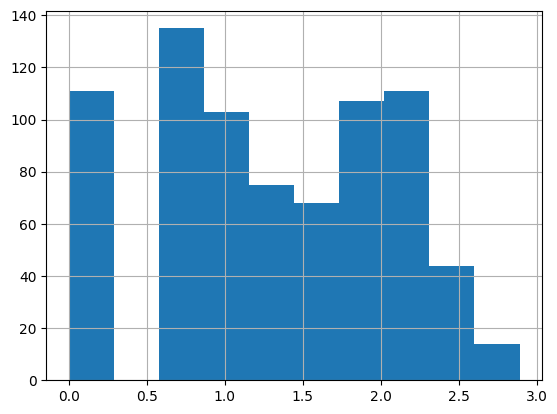

In [18]:
df['LogPregnancies'].hist();

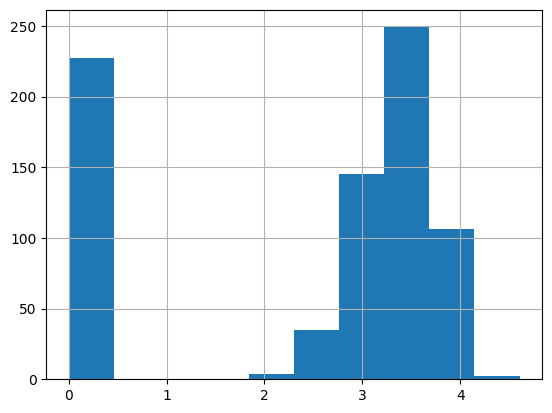

In [19]:
df['LogSkinThickness'].hist();

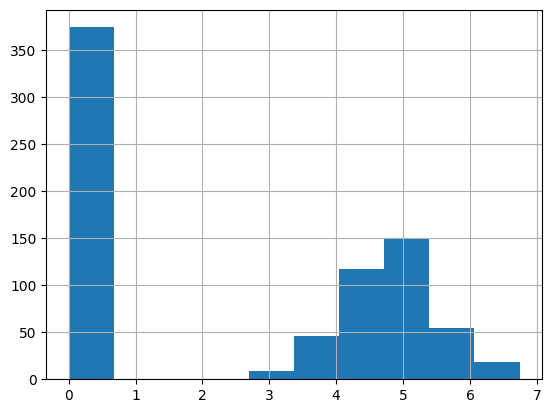

In [20]:
df['LogInsulin'].hist();

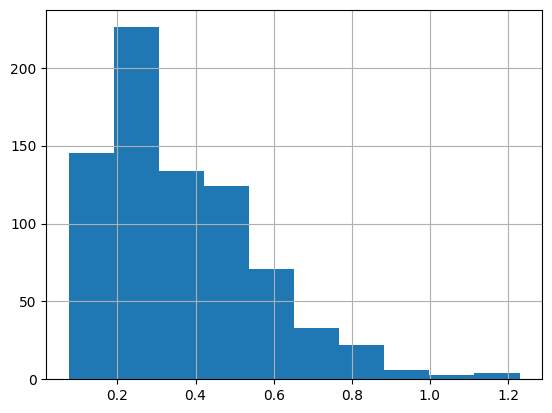

In [21]:
df['LogDiabetesPedigreeFunction'].hist();

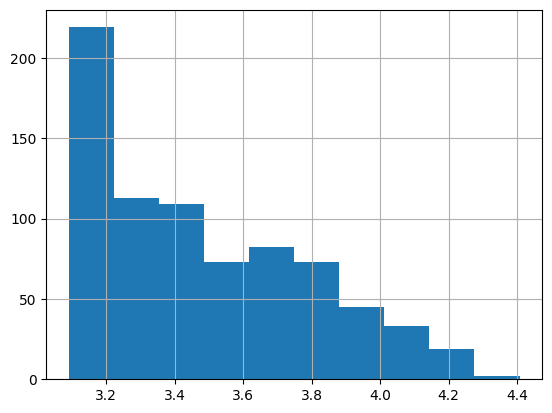

In [22]:
df['LogAge'].hist();

In [23]:
# new features
features = [
    'LogPregnancies',
    'Glucose',
    'BloodPressure',
    'LogSkinThickness',
    'LogInsulin',
    'BMI',
    'LogDiabetesPedigreeFunction',
    'LogAge'
    ]

In [24]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42);

In [25]:
X_train,y_train = df_train[features],df_train["Outcome"] # training data and labels
X_test,y_test = df_test[features],df_test["Outcome"] # testing data and labels

In [26]:
model = GaussianNB()
model.fit(X_train, y_train)
print(f"[~] train acc: {model.score(X_train, y_train)}")
print(f"[~] test acc: {model.score(X_test, y_test)}")

[~] train acc: 0.7654723127035831
[~] test acc: 0.7402597402597403


In [27]:
X = df[features]
y = df['Outcome']
result = cross_val_score(model, X, y)
result.mean(), result.std()

(0.7735251676428148, 0.03193339358887209)

In [28]:
# assess whether the dataset is balanced or imbalanced
(df['Outcome'] == 1).sum() / df.shape[0]

0.3489583333333333

In [29]:
result = cross_val_score(model, X, y, scoring='roc_auc') # test for roc and area under the curve
result.mean(), result.std()

(0.8329070580013976, 0.023721798027192563)

In [30]:
result = cross_val_score(model, X, y, scoring='f1') # f1 score is less optimistic
result.mean(), result.std()

(0.6585245520391152, 0.04960140619609986)

Alalize the places where have missung data in order to assess whether it is feasuble to impute them.

In [31]:
missing_data_columns = [ # Pregnancies (this one has sense since a woman may not have children) 	Glucose 	BloodPressure 	SkinThickness 	Insulin 	BMI
    "Glucose",
    "BloodPressure",
    "SkinThickness",
    "Insulin",
    "BMI"
]

In [32]:
for col in missing_data_columns:
  print(f"[~] {col}: {np.where(df[col] == 0)[0].shape}") # reminder: where returns the row indexes where the booleam mask is true

[~] Glucose: (5,)
[~] BloodPressure: (35,)
[~] SkinThickness: (227,)
[~] Insulin: (374,)
[~] BMI: (11,)


The fist two features are feasible to handle with missing value inputation. In particular, dropping the rows with missing data. With the other ones, we might as well drop those features.

In [33]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'LogPregnancies',
       'LogSkinThickness', 'LogInsulin', 'LogDiabetesPedigreeFunction',
       'LogAge'],
      dtype='object')

In [34]:
drop_columns = [
    "LogSkinThickness",
    "LogInsulin",
    "SkinThickness",
    "Insulin",

] # columns that will be dropped from the analysis

In [35]:
df2 = df.copy().drop(drop_columns,axis = 1)
df2.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome', 'LogPregnancies',
       'LogDiabetesPedigreeFunction', 'LogAge'],
      dtype='object')

In [36]:
# missing value inputation
imputation_columns = [
    "Glucose",
    "BloodPressure",
    "BMI"
]

for col in imputation_columns:
  df2 = df2[df2[col] != 0]

In [37]:
df2.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome', 'LogPregnancies',
       'LogDiabetesPedigreeFunction', 'LogAge'],
      dtype='object')

In [38]:
# final features
features = [
    'LogPregnancies',
    'Glucose',
    'BloodPressure',
    'BMI',
    'LogDiabetesPedigreeFunction',
    'LogAge'
    ]

In [39]:
# perform the train test split operation again
df_train, df_test = train_test_split(df2, test_size=0.2, random_state=1337)
X_train,y_train = df_train[features],df_train["Outcome"] # training data and labels
X_test,y_test = df_test[features],df_test["Outcome"] # testing data and labels

In [40]:
model = GaussianNB()
model.fit(
    X_train,
    y_train
)

print(f"[~] train acc: {model.score(X_train, y_train)}")
print(f"[~] test acc: {model.score(X_test, y_test)}")

[~] train acc: 0.7616580310880829
[~] test acc: 0.8275862068965517


In [41]:
X = df2[features]
y = df2['Outcome']
result = cross_val_score(model, X, y)
result.mean(), result.std()

(0.7721264367816092, 0.023241424787067366)

Now, instead of trying to remove the data, we will fill them with missing values. I will fill the data using the mean.

In [42]:
df3 = df.copy()

#### Steps
- Extract the mean of each column without missing values
- Fill in the missing values with the mean.

In [43]:
df3.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'LogPregnancies',
       'LogSkinThickness', 'LogInsulin', 'LogDiabetesPedigreeFunction',
       'LogAge'],
      dtype='object')

In [44]:
missing_data_columns

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [45]:
missing_data_columns = [
    "Glucose",
    "BloodPressure",
    "LogSkinThickness",
    "LogInsulin",
    "BMI"
]

# missing data inputation using each feature's mean
for col in missing_data_columns:
  m = df3[df3[col] != 0][col].mean()
  df3.loc[df3[col] == 0,col] = m
  print(f"[~] {col}: {m}")

[~] Glucose: 121.6867627785059
[~] BloodPressure: 72.40518417462484
[~] LogSkinThickness: 3.341780709718777
[~] LogInsulin: 4.8184560579804305
[~] BMI: 32.457463672391015


In [46]:
features = [
    'LogPregnancies',
    'Glucose',
    'BloodPressure',
    'LogSkinThickness',
    'LogInsulin',
    'BMI',
    'LogDiabetesPedigreeFunction',
    'LogAge']


In [47]:
df_train, df_test = train_test_split(df3, test_size=0.2, random_state=1337)
X_train,y_train = df_train[features],df_train["Outcome"] # training data and labels
X_test,y_test = df_test[features],df_test["Outcome"] # testing data and labels

In [48]:
df_train.shape, df_test.shape

((614, 14), (154, 14))

Note that now there is no minimum value of zero anywhere but on pregnancies (where the value of zero has actually a numerical meaning).

In [49]:
df3[features].describe()

,LogPregnancies,Glucose,BloodPressure,LogSkinThickness,LogInsulin,BMI,LogDiabetesPedigreeFunction,LogAge
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,1.310613,121.686763,72.405184,3.341781,4.818456,32.457464,0.365317,3.481574
std,0.769830,30.435949,12.096346,0.312534,0.494812,6.875151,0.198510,0.313364
min,0.000000,44.000000,24.000000,2.079442,2.708050,18.200000,0.075107,3.091042
25%,0.693147,99.750000,64.000000,3.258097,4.808086,27.500000,0.218131,3.218876
50%,1.386294,117.000000,72.202592,3.341781,4.818456,32.400000,0.316633,3.401197
75%,1.945910,140.250000,80.000000,3.496508,4.853976,36.600000,0.486277,3.737670
max,2.890372,199.000000,122.000000,4.605170,6.741701,67.100000,1.229641,4.406719


In [50]:
# train the model again
model = GaussianNB()
model.fit(
    X_train,
    y_train
)

print(f"[~] train acc: {model.score(X_train, y_train)}")
print(f"[~] test acc: {model.score(X_test, y_test)}")

[~] train acc: 0.737785016286645
[~] test acc: 0.7857142857142857


For the roc-auc and the f1 score cross validation scores, the usual method used until now will not work as we have no means of performing the mean missing value inputation method. This is because with the implemented function, we do not get to access the middle sub datasets created for the cross validation scores, so we have no means of making any kind of preprocessing in between the scores' computations. We will handle this by creating a pipeline.

In [51]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [52]:
df4 = df.copy()

The pipeline requires a specific differentiable value for to identify missing values. We will mark them using ```np.nan```.


In [53]:
missing_data_columns

['Glucose', 'BloodPressure', 'LogSkinThickness', 'LogInsulin', 'BMI']

In [54]:
for col in missing_data_columns: # mark the missing values
  df4.loc[df4[col] == 0,col] = np.nan

In [55]:
X,y = df4[features],df4['Outcome']

In [56]:
# create the processing pipeline
model_pipeline = Pipeline(
    [
        ("imputer",SimpleImputer(missing_values=np.nan,strategy="mean")),
        ("naive_bayes",GaussianNB())
    ]
)

In [57]:
result = cross_val_score(model_pipeline, X, y)
result.mean(), result.std()

(0.7552669552669553, 0.02254945695664825)

In [58]:
result = cross_val_score(model_pipeline, X, y, scoring='roc_auc')
result.mean(), result.std()

(0.8302606568832983, 0.023951503983552246)

In [59]:
result = cross_val_score(model_pipeline, X, y, scoring='f1')
result.mean(), result.std()

(0.6479104260645953, 0.0332292168473489)